In [20]:
# imports 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import tensorflow as tf 
from tensorflow import keras

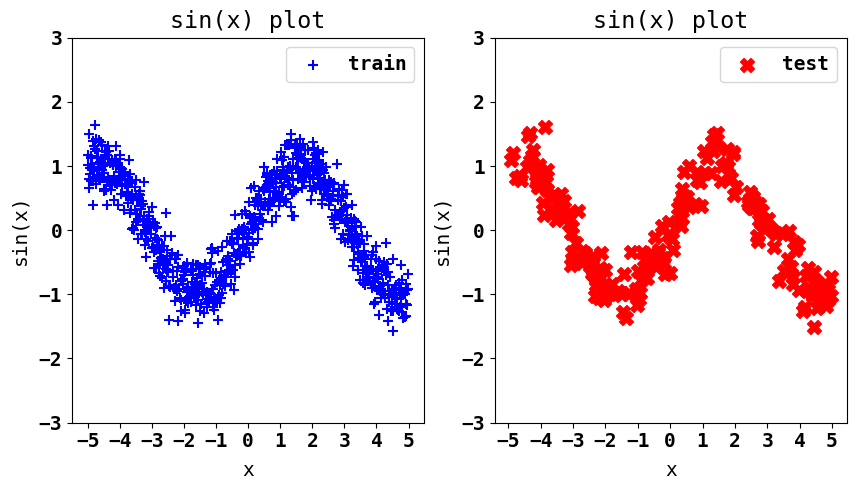

In [32]:
# x and y definition
x =np.arange(-5 ,5 ,0.01 ,dtype =np.float32).reshape(-1,1)
y =np.sin(x).reshape(-1,1)
noise =(np.random.normal(loc =0 ,scale =1 ,size =1000) * 0.25).reshape(-1,1).astype(np.float32)
y_noise =y +noise
xtr ,xte ,ytr ,yte =train_test_split(x ,y_noise ,test_size =0.2)
font ={'family' :'monospace' ,'weight' :'bold' ,'size' :14}
plt.rc('font' ,**font)
def plot_detail() : 
    plt.xticks(ticks =np.arange(-5 ,6 ,dtype =np.int32))
    plt.yticks(ticks =np.arange(-3 ,4 ,dtype =np.int32))
    plt.xlabel('x' ,labelpad =7) 
    plt.ylabel('sin(x)' ,labelpad =7) 
    plt.title('sin(x) plot' ,pad =7) 
    plt.legend()
fig =plt.figure(num =1 ,figsize =(10,5) ,dpi =100) 
ax1 =fig.add_subplot(1,2,1)
ax1.scatter(xtr ,ytr ,color ='blue' ,s =50 ,marker ='+' ,label ='train')
plot_detail()
ax2 =fig.add_subplot(1,2,2)
ax2.scatter(xte ,yte ,color ='red' ,s =100 ,marker ='X' ,label ='test')
plot_detail()
plt.show()

In [22]:
# model definition
def create_model() : 
    model =keras.Sequential([    
        keras.Input(shape =(1,)) ,
        keras.layers.Dense(units =1024) ,
        keras.layers.BatchNormalization() ,
        keras.layers.LeakyReLU(negative_slope =0.2) ,
        keras.layers.Dropout(rate =0.3) ,
        keras.layers.Dense(units =512) ,
        keras.layers.BatchNormalization() ,
        keras.layers.LeakyReLU(negative_slope =0.2) ,
        keras.layers.Dropout(rate =0.3) ,
        keras.layers.Dense(units =256) ,
        keras.layers.BatchNormalization() ,
        keras.layers.LeakyReLU(negative_slope =0.2) ,
        keras.layers.Dropout(rate =0.3) ,
        keras.layers.Dense(units =128) ,
        keras.layers.BatchNormalization() ,
        keras.layers.LeakyReLU(negative_slope =0.2) ,
        keras.layers.Dropout(rate =0.3) ,
        keras.layers.Dense(units =64) ,
        keras.layers.BatchNormalization() ,
        keras.layers.LeakyReLU(negative_slope =0.2) ,
        keras.layers.Dropout(rate =0.3) ,
        keras.layers.Dense(units =32) ,
        keras.layers.BatchNormalization() ,
        keras.layers.LeakyReLU(negative_slope =0.2) ,
        keras.layers.Dropout(rate =0.3) ,
        keras.layers.Dense(units =1) ,
        keras.layers.BatchNormalization() ,
        keras.layers.Activation(keras.activations.linear)
    ])
    model.compile(optimizer =keras.optimizers.Adam(learning_rate =0.007) ,loss =keras.losses.MeanSquaredError ,metrics =[keras.metrics.R2Score])
    return model
model =create_model()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 1024)           │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_13 (LeakyReLU)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_14 (LeakyReLU)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_15 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_16 (LeakyReLU)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │             

 Total params: 709,509 (2.71 MB)

 Trainable params: 705,475 (2.69 MB)

 Non-trainable params: 4,034 (15.76 KB)

In [1]:
# cross validation
n_split =4
kf =KFold(n_splits=n_split ,shuffle=True)
r2c_total =[]
for trc_idx ,valc_idx in kf.split(xtr ,ytr) : 
    xtrc =xtr[trc_idx]
    ytrc =ytr[trc_idx]
    xvalc =xtr[valc_idx]
    yvalc =ytr[valc_idx]
    model.fit(xtrc ,ytrc ,batch_size=32 ,epochs=200 ,validation_data=(xvalc ,yvalc) ,verbose =2)
    r2c =model.evaluate(xvalc ,yvalc)[1]
    r2c_total.append(r2c) 
r2c_total_mean =np.mean(r2c_total) 
print(f'r2c_total_mean for k ={n_split} : {r2c_total_mean}')    

In [2]:
# model retrain
epochs =200
batch_size =64
fpath ='checkpoint.weights.h5'
checkpoint =keras.callbacks.ModelCheckpoint(filepath=fpath ,monitor ='val_loss' ,mode ='min' ,save_weights_only =True ,save_best_only =True)
early_stop =keras.callbacks.EarlyStopping(monitor ='val_loss' ,min_delta =0.0001 ,patience =60 ,mode ='min' ,restore_best_weights =True)
result =model.fit(xtr ,ytr ,batch_size =batch_size ,epochs =epochs ,validation_data =(xtr ,ytr) ,callbacks=[checkpoint ,early_stop] ,verbose =2)

In [25]:
# evaluation metrics
eva =model.evaluate(xte ,yte)
Yte =model.predict(xte)
test_loss =eva[0] 
test_r2_per =eva[1] *100
print(f'loss_for_test_data : {test_loss}' ,'\n')
print(f'r2_score_for_test_data : {test_r2_per} %')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0609 - r2_score: 0.8838 
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
loss_for_test_data : 0.061851177364587784 

r2_score_for_test_data : 88.51960301399231 %


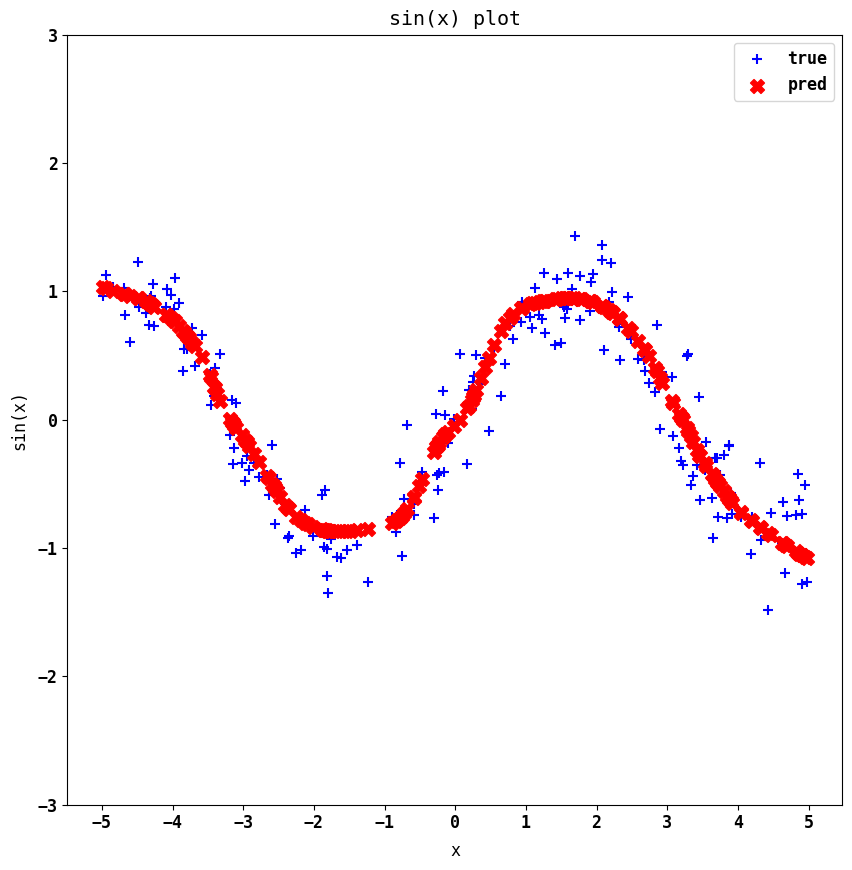

In [26]:
# scatter plot
fig =plt.figure(num =2 ,figsize =(10,10) ,dpi =100) 
ax1 =fig.add_subplot(1,1,1)
ax1.scatter(xte ,yte ,c ='blue' ,s =50 ,marker ='+' ,label ='true')
ax1.scatter(xte ,Yte ,c ='red' ,s =100 ,marker ='X' ,label ='pred')
plot_detail()
plt.show()

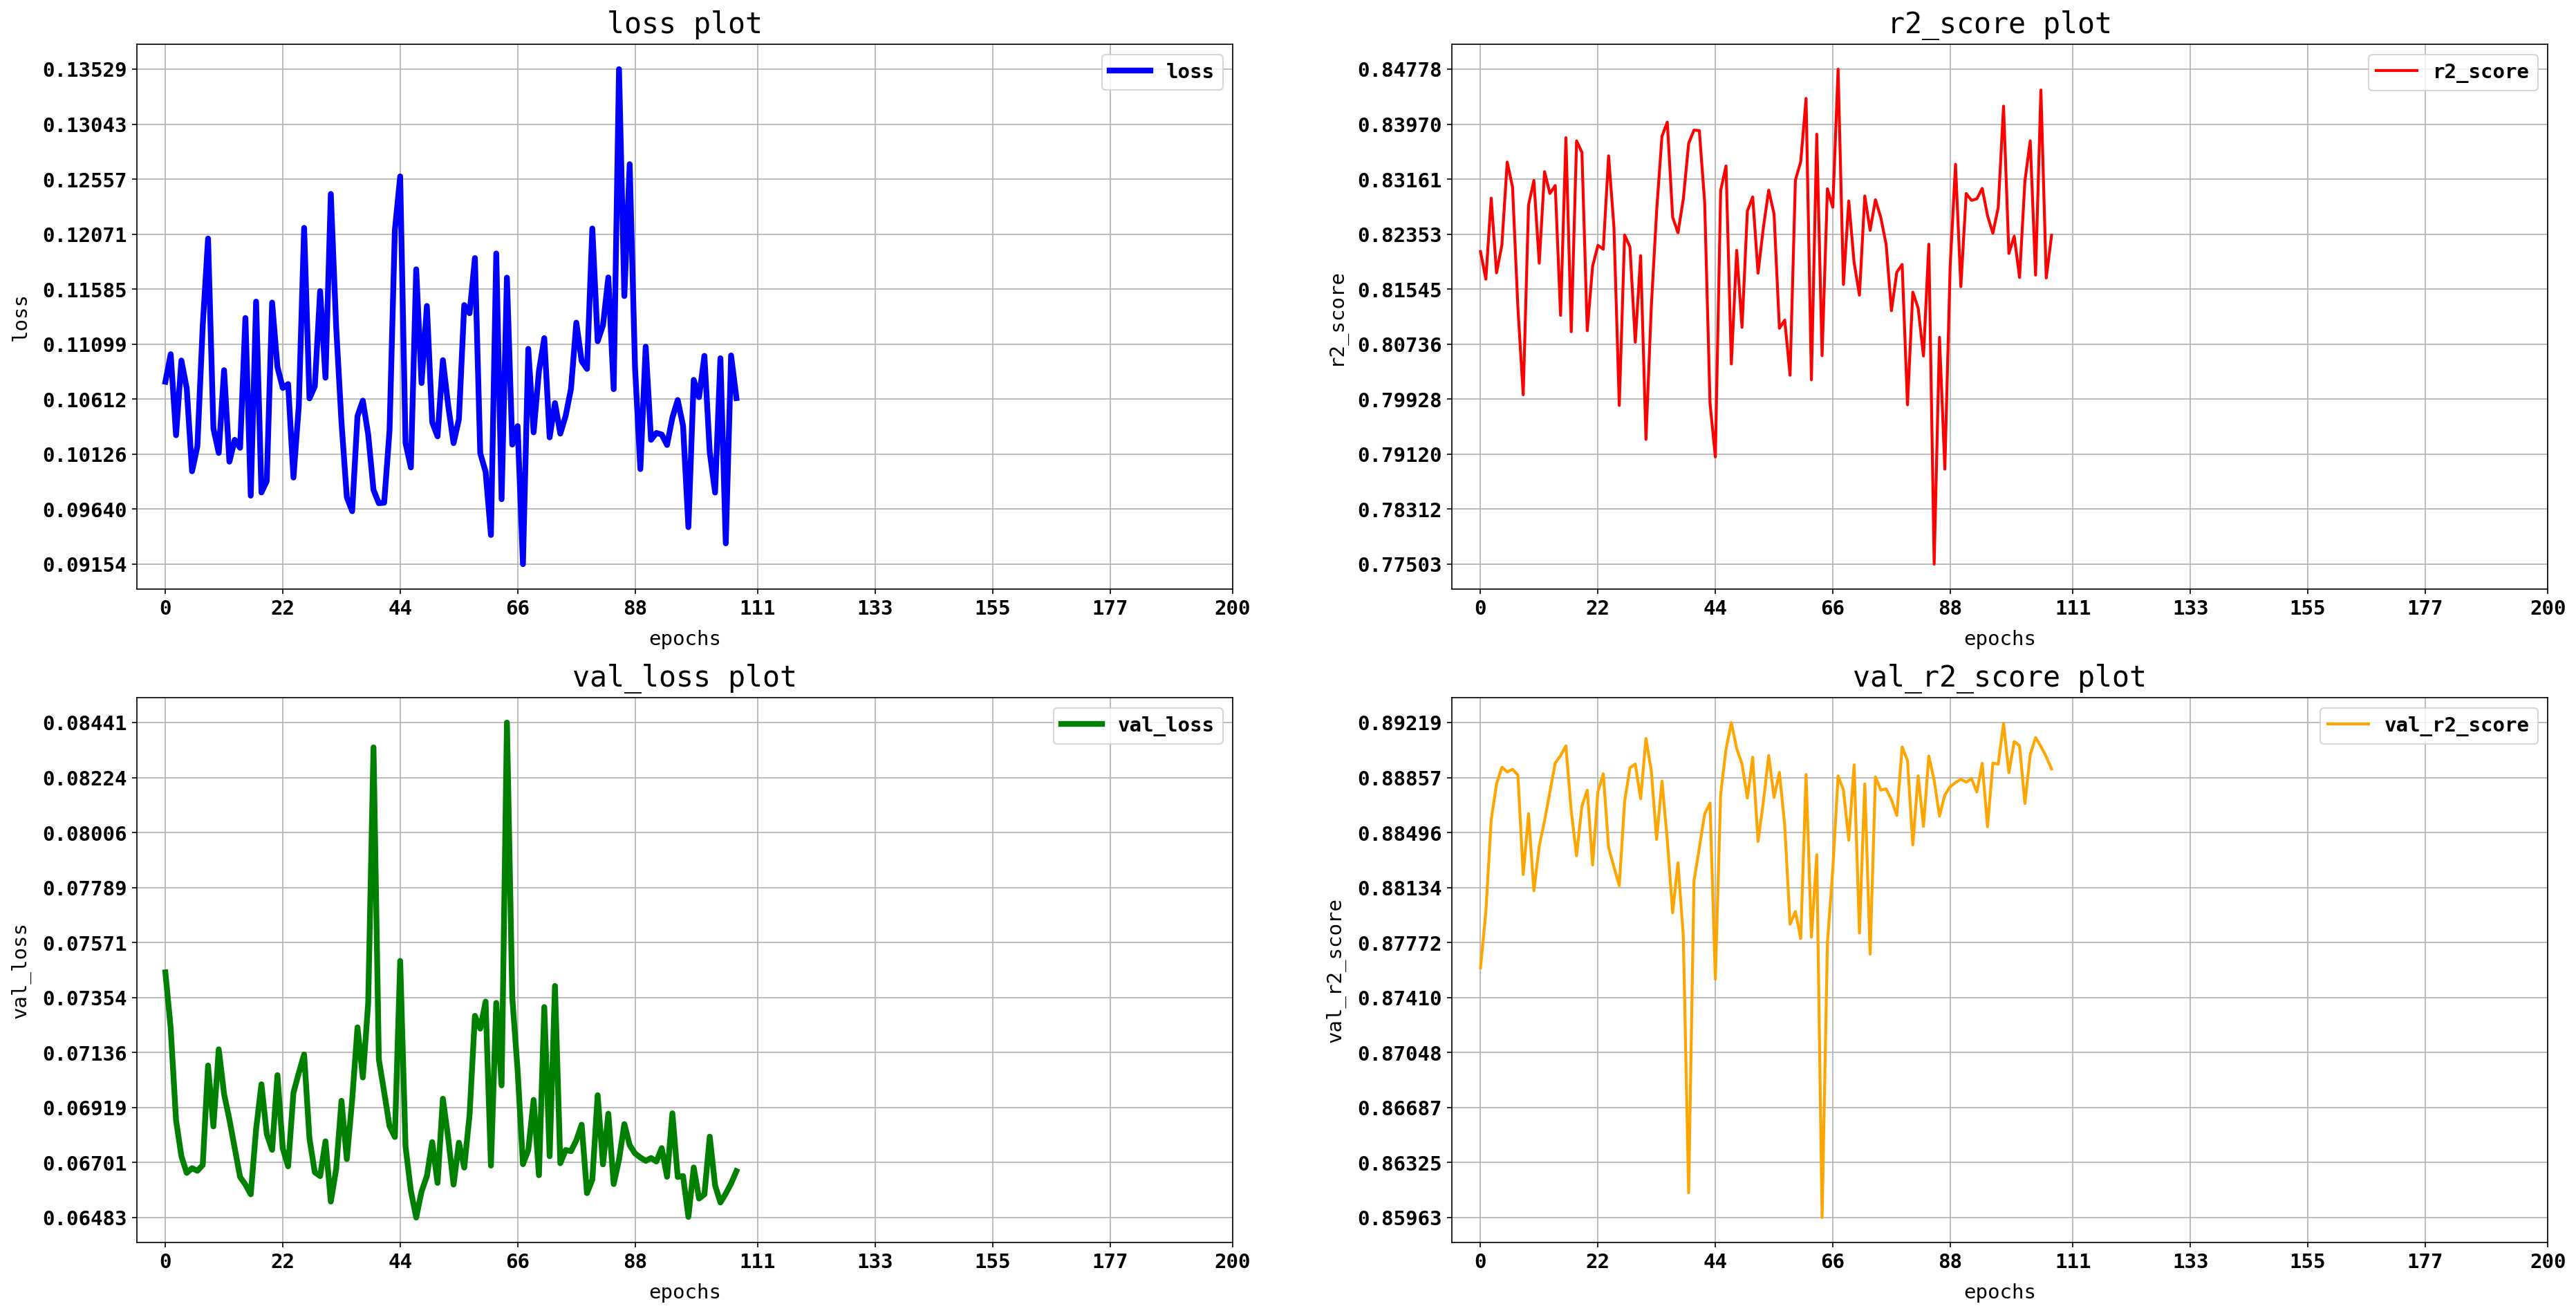

In [33]:
# evaluationo plot
def loss_plot_detail(item) :
    plt.xticks(ticks =np.linspace(0 ,epochs ,10 ,dtype='int'))
    plt.yticks(ticks =np.linspace(np.min(result.history[item]) ,np.max(result.history[item]) ,10)) 
    plt.xlabel(xlabel ='epochs' ,labelpad =8)
    plt.ylabel(ylabel =item ,labelpad =8)
    plt.title(label =f'{item} plot' ,pad =8 ,fontdict={'size' :20})
    plt.legend()
    plt.grid()
fig =plt.figure(num =3 ,figsize =(30,15) ,dpi =150) 
ax1 =fig.add_subplot(2,2,1)
ax1.plot(result.history['loss'] ,ls ='-' ,lw =4 ,color ='blue' ,label ='loss') 
loss_plot_detail('loss')
ax2 =fig.add_subplot(2,2,2)
ax2.plot(result.history['r2_score'] ,ls ='-' ,lw =2 ,color ='red' ,label ='r2_score') 
loss_plot_detail('r2_score')
ax3 =fig.add_subplot(2,2,3)
ax3.plot(result.history['val_loss'] ,ls ='-' ,lw =4 ,color ='green' ,label ='val_loss') 
loss_plot_detail('val_loss')
ax3 =fig.add_subplot(2,2,4)
plt.plot(result.history['val_r2_score'] ,ls ='-' ,lw =2 ,color ='orange' ,label ='val_r2_score') 
loss_plot_detail('val_r2_score')
plt.show()
